# 1. _Counting Sort_

## 1.1 Descripción del problema

Se quiere ordenar un arreglo $A$.

**Entrada**: El algoritmo recibe un arreglo $A$ de $n$ elementos enteros positivos, con $n \in \mathbb{N}$.

**Salida**: El algoritmo retorna un arreglo con los elementos en orden ascendente.

## 1.2. Implementación del algoritmo

In [1]:
def countSort(arr, verbose=False):
    max_element = int(max(arr))
    min_element = int(min(arr))
    range_of_elements = max_element - min_element + 1

    # Arreglo contador con sus elementos inicializados en 0 de largo k+1
    count_arr = [0 for _ in range(range_of_elements)] # arreglo contador
    output_arr = [0 for _ in range(len(arr))] # arreglo de salida
 
    # Se llena el arreglo contador
    for i in range(0, len(arr)):
        count_arr[arr[i]-min_element] += 1
        if verbose:
            print(f'Iteración {i+1} del arreglo contador: {count_arr}')
 
    # Se genera el arreglo que contiene las posiciones de los elementos para
    # Agregarlos al arreglo de salida
    for i in range(1, len(count_arr)):
        count_arr[i] += count_arr[i-1]
    
    if verbose:
        print(f'\nArreglo contador (posiciones de elementos): {count_arr}\n')
 
    # Se llena el arreglo de salida
    j = 0
    for i in range(len(arr)-1, -1, -1):
        j += 1
        output_arr[count_arr[arr[i] - min_element] - 1] = arr[i]
        count_arr[arr[i] - min_element] -= 1
        if verbose:
            print(f'Iteración {j} del arreglo output: {output_arr}')
 
    # El arreglo de entrada se sobreescribe con los elementos del de salida
    for i in range(0, len(arr)):
        arr[i] = output_arr[i]
 
    return arr

In [2]:
arr = [6, 0, 2, 0, 1, 3, 4, 6, 1, 3, 2]
print("Input:", arr, "\n")
salida = countSort(arr)
print("Output",salida)

Input: [6, 0, 2, 0, 1, 3, 4, 6, 1, 3, 2] 

Output [0, 0, 1, 1, 2, 2, 3, 3, 4, 6, 6]


## 1.3. Descripción del algoritmo

El algoritmo recibe un arreglo $A$ de entrada. Se crea un arreglo $C$ auxiliar que servirá como contador de los elementos de $A$. Por cada elemento $x$ en $A$, en $C$ se cuentan los elementos menores o iguales a $x$.

Luego, se calculan las posiciones de los elementos a agregar al arreglo de salida $B$ sumando los contadores de $C$ desde la posición 1 de manera acumulativa (C[i] += C[i-1]).

Finalmente, recorriendo $A$ al revés se agregan los elementos directamente a la posición que les corresponde (según las calculadas en $C$), inmediatamente seguido por una resta al contador en $C$.

## 1.4. Desarrollo del algoritmo con opción `verbose`

In [3]:
arr = [6, 0, 2, 0, 1, 3, 4, 6, 1, 3, 2]
print("Input:", arr, "\n")
salida = countSort(arr, True)
print("\nOutput",salida)

Input: [6, 0, 2, 0, 1, 3, 4, 6, 1, 3, 2] 

Iteración 1 del arreglo contador: [0, 0, 0, 0, 0, 0, 1]
Iteración 2 del arreglo contador: [1, 0, 0, 0, 0, 0, 1]
Iteración 3 del arreglo contador: [1, 0, 1, 0, 0, 0, 1]
Iteración 4 del arreglo contador: [2, 0, 1, 0, 0, 0, 1]
Iteración 5 del arreglo contador: [2, 1, 1, 0, 0, 0, 1]
Iteración 6 del arreglo contador: [2, 1, 1, 1, 0, 0, 1]
Iteración 7 del arreglo contador: [2, 1, 1, 1, 1, 0, 1]
Iteración 8 del arreglo contador: [2, 1, 1, 1, 1, 0, 2]
Iteración 9 del arreglo contador: [2, 2, 1, 1, 1, 0, 2]
Iteración 10 del arreglo contador: [2, 2, 1, 2, 1, 0, 2]
Iteración 11 del arreglo contador: [2, 2, 2, 2, 1, 0, 2]

Arreglo contador (posiciones de elementos): [2, 4, 6, 8, 9, 9, 11]

Iteración 1 del arreglo output: [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
Iteración 2 del arreglo output: [0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0]
Iteración 3 del arreglo output: [0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0]
Iteración 4 del arreglo output: [0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 6]
Iterac

# 2. RadixSort

## 2.1. Implementación del algoritmo

In [4]:
def expCountSort(arr, exp):
    n = len(arr)
    out = [0] * (n)
    count = [0] * (10)

    for i in range(0, n):
        index = arr[i] // exp
        count[index % 10] += 1
 
    for i in range(1, 10):
        count[i] += count[i - 1]
 
    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        out[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
 
    i = 0
    for i in range(0, len(arr)):
        arr[i] = out[i]

In [5]:
def radixSort(arr, verbose=False):
    max1 = max(arr)
 
    # El exponente sirve para calcular el valor de cada dígito de los elementos
    exp = 1
    j = 0
    while max1 / exp >= 1:
        j += 1
        # Se aplica el algoritmo de ordenamiento para comparar por dígitos
        expCountSort(arr, exp)
        if verbose:
            print(f'Iteración {j}: {arr}')
        exp *= 10

## 2.2. Descripción del algoritmo

_Radix Sort_ sirve para ordenar conjuntos de datos aplicando varios criterios uno después del otro. Así, por ejemplo, se puede ordenar una tabla por Nombre del alumno, luego por curso y finalmente por promedio final.

Para ello, este algoritmo hace uso de algun otro algoritmo de ordenamiento en cada una de sus iteraciones. En este caso, _Counting Sort_ adaptado para ordenar dígitos del 0 al 9.

En su primera iteración, _Radix Sort_ ordena números según su ultimo dígito, en su segunda por el dígito de las decenas, en la siguiente el de las centenas y así sucesivamente.

## 2.3. Desarrollo del algoritmo con opción `verbose`

In [6]:
arr = [170, 45, 75, 90, 802, 24, 2, 66]
print("Input:", arr, "\n")
radixSort(arr, True)
print("\nOutput", arr)

Input: [170, 45, 75, 90, 802, 24, 2, 66] 

Iteración 1: [170, 90, 802, 2, 24, 45, 75, 66]
Iteración 2: [802, 2, 24, 45, 66, 170, 75, 90]
Iteración 3: [2, 24, 45, 66, 75, 90, 170, 802]

Output [2, 24, 45, 66, 75, 90, 170, 802]


# 3. Correctitudes

## 3.1. _Counting Sort_

_Hipótesis inductiva_: _Counting Sort_ es estable en arreglos de no más de $k$ elementos.

**Caso base**: con $n = 1$, el arreglo A está trivialmente ordenado, ya que contiene un punico elemento.

**Caso general**: considerando un arreglo de $k+1$ elementos, éste tiene un último elemento y es el mayor. Con el arreglo de tamaño $k$ (eliminando el elemento en la posición $k+1$) se cumple, por la hipótesis inductiva, que el algoritmo es estable.

Al agregar el elemento $k+1$, éste no puede ser posicionado a la izquierda del arreglo, porque al construir el arreglo $B$, se recorre en orden descendente, por lo que al agregar el mayor elemento, éste será añadido en la posición de más a la derecha. Además, esto es seguro, ya que si existen elementos con el mismo valor, C[A[i]] se reduce en 1, lo que fuerza al siguiente elemento a ser agregado a la izquierda del reciente. 

## 3.2. _Radix Sort_

**Caso base**: en el caso $d=1$ se cumple que _Radix Sort_ usa un algoritmo estable para ordenar dígitos en el rango $[0,...,9]$. Así, con $x_i < y_i$, $x$ aparecerá antes que $y$, y con $x_i = y_i$ sus posiciones no cambiarán porque el algoritmo que se usa es estable.

**Caso general**: se asume que _Radix Sort_ ordenó correctamente después de $i-1 < d$ iteraciones, los elementos $x_{i-1}$ están ordenados de manera ascendente.

En el caso $x_i < y_i$ existen 2 casos:

1. El dígito $i$ de $x$ es menor que el dígito $i$ de $y$. _Radix Sort_ pondrá $x$ antes que $y$ correctamente.
2. El dígito $i$ de $x$ es igual que el dígito $i$ de $y$. Por la hipótesis inductiva, $x_{i-1} < y_{i-1}$ por lo que $x$ aparece antes que $y$ y como los dígitos $i$ de ambos elementos son iguales, dichos elementos se mantendrán en orden.

# 4. Tiempos de ejecución

## 4.1. _Counting Sort_

El algoritmo itera sobre el arreglo de entrada una vez, por lo que tiene complejidad $O(n)$. Luego itera sobre el arreglo de contadores, que posee complejidad $O(k)$. Así, _Counting Sort_ tiene complejidad temporal $O(n+k)$.

## 4.2. _Radix Sort_

Este algoritmo tiene complejidad de la forma $O(d \cdot (n+b))$, con $b$ el número de posibles valores que pueden tomar los dígitos y $d$ la cantidad de pasadas que realiza el algoritmo.

En el mejor caso, los valores a ordenar tienen la misma cantidad de dígitos, por lo que su complejidad es $\Omega(d \cdot (n+b))$. Si $b=O(n)$, $\Omega(nb)$.

En el peor caso, los valores tienen el mismo número de dígitos excepto uno que tiene muchos más. Si el número de dígitos del número más largo es $n$, la complejidad será $O(n^2)$.

# 5. Experimentos

In [7]:
import datetime
from math import log
import matplotlib.pyplot as plt
import random
from timeit import repeat

%matplotlib inline

In [8]:
def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b     
              
def bucketSort(x):
    # Asumiendo que los valores de entrada están en el rangoo [100, 999]
    x = [i / 1000 for i in x]
    arr = []
    slot_num = 10
    for i in range(slot_num):
        arr.append([])

    for j in x:
        index_b = int(slot_num * j) 
        arr[index_b].append(j)

    for i in range(slot_num):
        arr[i] = insertionSort(arr[i])

    k = 0
    for i in range(slot_num):
        for j in range(len(arr[i])):
            x[k] = arr[i][j]
            k += 1
    return x

### 5.1. _Counting Sort_ vs _Bucket Sort_

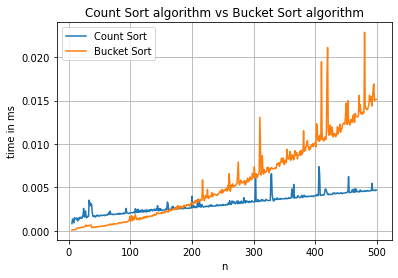

In [11]:
x = []
y = []

x2 = []
y2 = []

for n in range(5,500):
    a = random.sample(range(100, 1000), n)
    t = repeat(setup="from __main__ import countSort", stmt=f"countSort({a})", repeat=1, number=10)
    x.append(n)
    y.append(t)

for n2 in range(5,500):
    a2 = random.sample(range(100, 1000), n2)
    t2 = repeat(setup="from __main__ import bucketSort, insertionSort", stmt=f"bucketSort({a2})", repeat=1, number=10)
    x2.append(n2)
    y2.append(t2)

plt.plot(x, y)
plt.plot(x2, y2)
plt.legend(["Count Sort", "Bucket Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title("Count Sort algorithm vs Bucket Sort algorithm")

plt.grid()
plt.show()

Como se puede apreciar en el gráfico, _Bucket Sort_ es más eficiente en listas de más o menos 80 elementos o menos, mientras que en listas de más cantidad de elementos _Count Sort_ se vuelve más eficiente.

### 5.2. _Radix Sort_ vs _Bucket Sort_

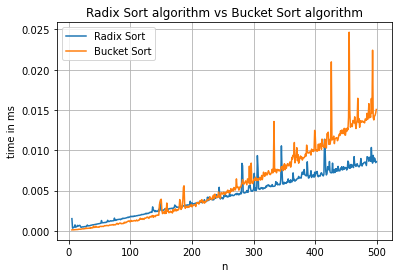

In [13]:
x = []
y = []

x2 = []
y2 = []

for n in range(5,500):
    a = random.sample(range(100, 1000), n)
    t = repeat(setup="from __main__ import radixSort, expCountSort", stmt=f"radixSort({a})", repeat=1, number=10)
    x.append(n)
    y.append(t)

for n2 in range(5,500):
    a2 = random.sample(range(100, 1000), n2)
    t2 = repeat(setup="from __main__ import bucketSort, insertionSort", stmt=f"bucketSort({a2})", repeat=1, number=10)
    x2.append(n2)
    y2.append(t2)

plt.plot(x, y)
plt.plot(x2, y2)
plt.legend(["Radix Sort", "Bucket Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title("Radix Sort algorithm vs Bucket Sort algorithm")

plt.grid()
plt.show()

Al igual que pasa con _Count Sort_, _Radix Sort_ es más eficiente que _Bucket Sort_ desde listas de más o menos 230 elementos, según el gráfico. Se cumple, al igual que en el caso anterior, que _Bucket Sort_ es más eficiente en listas de pocos elementos.